In [6]:
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import inv, norm

import os
os.chdir('/home/kei/Desktop/dpp/')

import sampler.dpp as dpp
import sampler.utils as utils

In [9]:
# currently only support cpu mode
flag_gpu = False

lmbd = 1e-4
sigma = 100
data = pd.read_csv('data/ailerons.txt')[:5000].as_matrix()
nTrn = 4000
trnY = data[:nTrn, -1]
tstY = data[nTrn:, -1]
pairwise_dists = squareform(pdist(data[:,:-1], 'euclidean'))
L = np.exp(-pairwise_dists ** 2 / 100 ** 2)
trnL = L[:nTrn, :nTrn]

k_group = [20,30,50,70,100]
error_unif = np.zeros((3, len(k_group)))
error_dpp = np.zeros((3, len(k_group)))

/home/kei/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [11]:
for run_id in range(5):
    for k_idx in range(len(k_group)):
        k = k_group[k_idx]
        # Uniform sampling
        unif_smpl = np.random.permutation(nTrn)[:k]

        C = trnL[np.ix_(range(nTrn), unif_smpl)]
        W = C[np.ix_(unif_smpl, range(k))]
        trnL_prime = C.dot(inv(W)).dot(C.transpose())
        error_unif[0,k_idx] += norm(trnL_prime - trnL, 'fro')
        alpha = inv(trnL_prime + nTrn * lmbd * np.identity(nTrn)).dot(trnY)
        Y_hat = L[:,:nTrn].dot(alpha)
        error_unif[1,k_idx] += norm(Y_hat[:nTrn] - trnY)
        error_unif[2,k_idx] += norm(Y_hat[nTrn:] - tstY)

        # DPP
        D, V = utils.get_eig(trnL, flag_gpu=flag_gpu)
        E = utils.get_sympoly(D, k, flag_gpu=flag_gpu)
        dpp_smpl  = dpp.sample(D, V, E=E, k=k, flag_gpu=flag_gpu)

        C = trnL[np.ix_(range(nTrn), dpp_smpl)]
        W = C[np.ix_(dpp_smpl, range(k))]
        trnL_prime = C.dot(inv(W)).dot(C.transpose())
        error_dpp[0,k_idx] += norm(trnL_prime - trnL, 'fro')
        alpha = inv(trnL_prime + nTrn * lmbd * np.identity(nTrn)).dot(trnY)
        Y_hat = L[:,:nTrn].dot(alpha)
        error_dpp[1,k_idx] += norm(Y_hat[:nTrn] - trnY)
        error_dpp[2,k_idx] += norm(Y_hat[nTrn:] - tstY)

In [13]:
%matplotlib inline

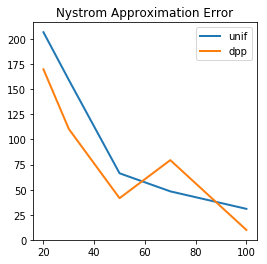

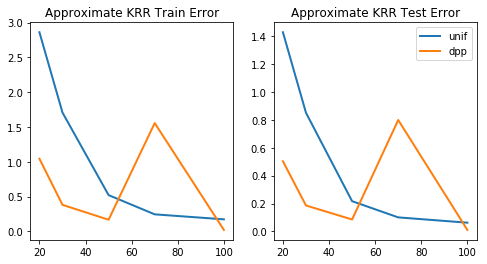

In [14]:
plt.figure(figsize=(4,4))
plt.title('Nystrom Approximation Error')
plt.plot(k_group, error_unif[0] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[0] / 5., label='dpp', lw=2)
plt.legend()
plt.savefig('fig/nystrom', bbox_inches='tight')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Approximate KRR Train Error')
plt.plot(k_group, error_unif[1] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[1] / 5., label='dpp', lw=2)
plt.subplot(1,2,2)
plt.title('Approximate KRR Test Error')
plt.plot(k_group, error_unif[2] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[2] / 5., label='dpp', lw=2)
plt.legend()

plt.savefig('fig/regression', bbox_inches='tight')

In [15]:
for run_id in range(5):
    for k_idx in range(len(k_group)):
        k = k_group[k_idx]
        # Uniform sampling
        unif_smpl = np.random.permutation(nTrn)[:k]

        C = trnL[np.ix_(range(nTrn), unif_smpl)]
        W = C[np.ix_(unif_smpl, range(k))]
        trnL_prime = C.dot(inv(W)).dot(C.transpose())
        error_unif[0,k_idx] += norm(trnL_prime - trnL, 'fro')
        alpha = inv(trnL_prime + nTrn * lmbd * np.identity(nTrn)).dot(trnY)
        Y_hat = L[:,:nTrn].dot(alpha)
        error_unif[1,k_idx] += norm(Y_hat[:nTrn] - trnY)
        error_unif[2,k_idx] += norm(Y_hat[nTrn:] - tstY)

        # DPP
        D, V = utils.get_eig(trnL, flag_gpu=flag_gpu)
        E = utils.get_sympoly(D, k, flag_gpu=flag_gpu)
        dpp_smpl  = dpp.sample(D, V, E=E, k=k, flag_gpu=flag_gpu)

        C = trnL[np.ix_(range(nTrn), dpp_smpl)]
        W = C[np.ix_(dpp_smpl, range(k))]
        trnL_prime = C.dot(inv(W)).dot(C.transpose())
        error_dpp[0,k_idx] += norm(trnL_prime - trnL, 'fro')
        alpha = inv(trnL_prime + nTrn * lmbd * np.identity(nTrn)).dot(trnY)
        Y_hat = L[:,:nTrn].dot(alpha)
        error_dpp[1,k_idx] += norm(Y_hat[:nTrn] - trnY)
        error_dpp[2,k_idx] += norm(Y_hat[nTrn:] - tstY)

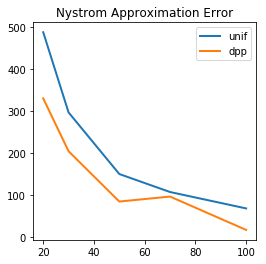

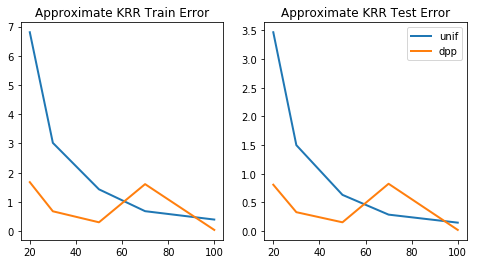

In [16]:
plt.figure(figsize=(4,4))
plt.title('Nystrom Approximation Error')
plt.plot(k_group, error_unif[0] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[0] / 5., label='dpp', lw=2)
plt.legend()
plt.savefig('fig/nystrom', bbox_inches='tight')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Approximate KRR Train Error')
plt.plot(k_group, error_unif[1] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[1] / 5., label='dpp', lw=2)
plt.subplot(1,2,2)
plt.title('Approximate KRR Test Error')
plt.plot(k_group, error_unif[2] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[2] / 5., label='dpp', lw=2)
plt.legend()

plt.savefig('fig/regression', bbox_inches='tight')

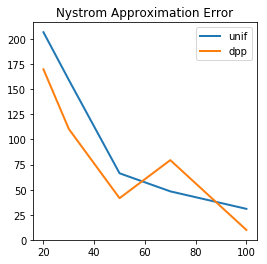

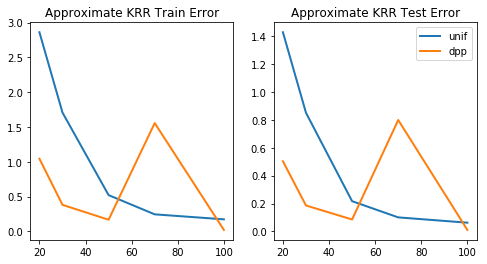

In [14]:
plt.figure(figsize=(4,4))
plt.title('Nystrom Approximation Error')
plt.plot(k_group, error_unif[0] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[0] / 5., label='dpp', lw=2)
plt.legend()
plt.savefig('fig/nystrom', bbox_inches='tight')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Approximate KRR Train Error')
plt.plot(k_group, error_unif[1] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[1] / 5., label='dpp', lw=2)
plt.subplot(1,2,2)
plt.title('Approximate KRR Test Error')
plt.plot(k_group, error_unif[2] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[2] / 5., label='dpp', lw=2)
plt.legend()

plt.savefig('fig/regression', bbox_inches='tight')

In [17]:
for run_id in range(5):
    for k_idx in range(len(k_group)):
        k = k_group[k_idx]
        # Uniform sampling
        unif_smpl = np.random.permutation(nTrn)[:k]

        C = trnL[np.ix_(range(nTrn), unif_smpl)]
        W = C[np.ix_(unif_smpl, range(k))]
        trnL_prime = C.dot(inv(W)).dot(C.transpose())
        error_unif[0,k_idx] += norm(trnL_prime - trnL, 'fro')
        alpha = inv(trnL_prime + nTrn * lmbd * np.identity(nTrn)).dot(trnY)
        Y_hat = L[:,:nTrn].dot(alpha)
        error_unif[1,k_idx] += norm(Y_hat[:nTrn] - trnY)
        error_unif[2,k_idx] += norm(Y_hat[nTrn:] - tstY)

        # DPP
        D, V = utils.get_eig(trnL, flag_gpu=flag_gpu)
        E = utils.get_sympoly(D, k, flag_gpu=flag_gpu)
        dpp_smpl  = dpp.sample(D, V, E=E, k=k, flag_gpu=flag_gpu)

        C = trnL[np.ix_(range(nTrn), dpp_smpl)]
        W = C[np.ix_(dpp_smpl, range(k))]
        trnL_prime = C.dot(inv(W)).dot(C.transpose())
        error_dpp[0,k_idx] += norm(trnL_prime - trnL, 'fro')
        alpha = inv(trnL_prime + nTrn * lmbd * np.identity(nTrn)).dot(trnY)
        Y_hat = L[:,:nTrn].dot(alpha)
        error_dpp[1,k_idx] += norm(Y_hat[:nTrn] - trnY)
        error_dpp[2,k_idx] += norm(Y_hat[nTrn:] - tstY)

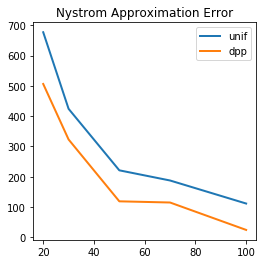

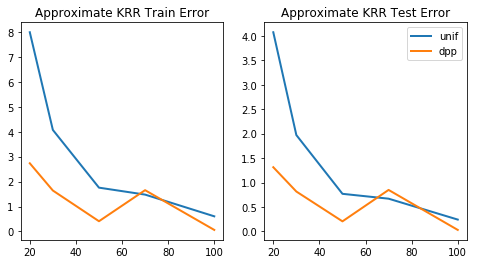

In [18]:
plt.figure(figsize=(4,4))
plt.title('Nystrom Approximation Error')
plt.plot(k_group, error_unif[0] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[0] / 5., label='dpp', lw=2)
plt.legend()
plt.savefig('fig/nystrom', bbox_inches='tight')

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title('Approximate KRR Train Error')
plt.plot(k_group, error_unif[1] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[1] / 5., label='dpp', lw=2)
plt.subplot(1,2,2)
plt.title('Approximate KRR Test Error')
plt.plot(k_group, error_unif[2] / 5., label='unif', lw=2)
plt.plot(k_group, error_dpp[2] / 5., label='dpp', lw=2)
plt.legend()

plt.savefig('fig/regression', bbox_inches='tight')